c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


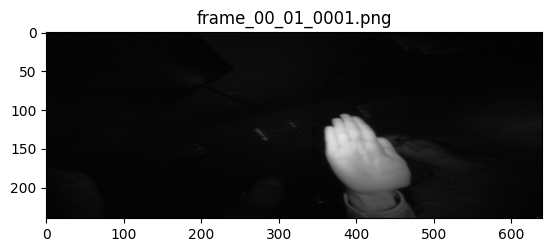

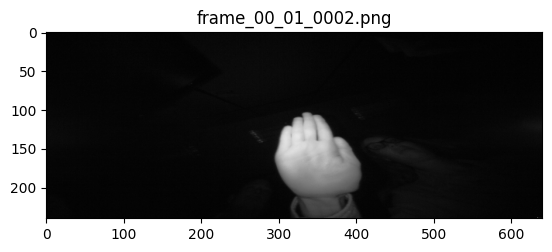

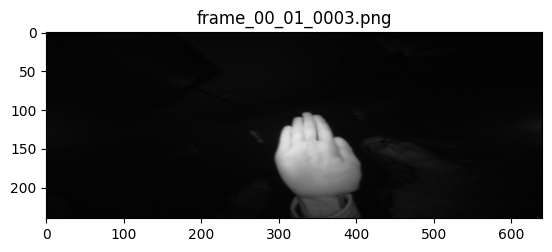

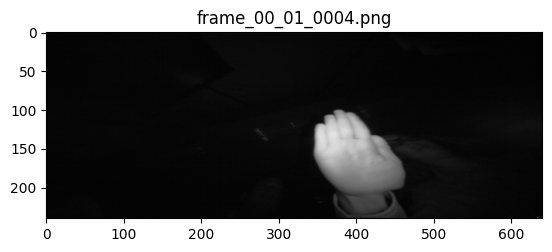

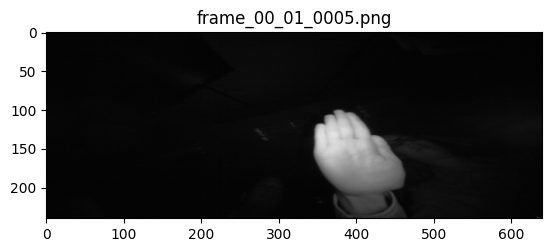

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the main dataset folder
dataset_path = 'I:\\coding\\projects\\personal_ws\\Internship\\Prodigy InfoTech Internship\\Gesture based control system\\Dataset\\leapGestRecog'

# List to store image paths
image_files = []

# Loop through all the session folders (00, 01, ...)
for session in os.listdir(dataset_path):
    session_path = os.path.join(dataset_path, session)
    
    # Loop through all gesture folders within a session
    for gesture in os.listdir(session_path):
        gesture_path = os.path.join(session_path, gesture)
        
        # Loop through all images in a gesture folder
        for img_file in os.listdir(gesture_path):
            if img_file.endswith('.png'):
                image_files.append(os.path.join(gesture_path, img_file))

# Check if there are enough images to display
if len(image_files) < 5:
    print(f"Only {len(image_files)} images found. Please check the dataset.")
else:
    # Display a few images
    for i in range(5):
        img = cv2.imread(image_files[i])
        if img is not None:  # Ensure the image was loaded correctly
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.title(os.path.basename(image_files[i]))
            plt.show()
        else:
            print(f"Error loading image {image_files[i]}")

In [1]:
%pip install colabcode

  Using cached colabcode-0.3.0-py3-none-any.whl (5.0 kB)
  Using cached pyngrok-7.2.0-py3-none-any.whl (22 kB)
  Using cached nest_asyncio-1.4.3-py3-none-any.whl (5.3 kB)
  Using cached uvicorn-0.13.1-py3-none-any.whl (45 kB)
  Using cached jupyterlab-3.0.7-py3-none-any.whl (8.3 MB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl (59 kB)
  Using cached jupyter_server-1.24.0-py3-none-any.whl (347 kB)
  Using cached nbclassic-0.5.6-py3-none-any.whl (10.0 MB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached anyio-3.7.1-py3-none-any.whl (80 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl (15 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl (257 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Using cached prometheus_client-0.20.0-py3-none-any.whl (54 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl (18 kB)
  Using cached terminado-0.18.1-py3-none-any.whl (14 kB)
  Using cached pywinpty-2.0.13-cp311-none-win_amd64.whl (1.4 MB)
  Usi

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\send2trash.exe' -> 'c:\\Python311\\Scripts\\send2trash.exe.deleteme'


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [6]:


# Define image dimensions
img_size = 128

# Lists to store images and labels
images = []
labels = []

# Loop through the image files to preprocess them
for img_path in image_files:
    # Load image
    img = cv2.imread(img_path)
    
    # Resize image to the defined size
    img = cv2.resize(img, (img_size, img_size))
    
    # Normalize image
    img = img / 255.0
    
    # Append image and corresponding label (folder name)
    images.append(img)
    labels.append(os.path.basename(os.path.dirname(img_path)))

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

NameError: name 'image_files' is not defined

In [7]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels_one_hot = to_categorical(labels_encoded)

print(f"Encoded labels shape: {labels_one_hot.shape}")

ValueError: zero-size array to reduction operation maximum which has no identity

In [8]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")

NameError: name 'labels_one_hot' is not defined

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)     

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Save the model for future use
model.save('hand_gesture_recognition_model.h5')

NameError: name 'X_train' is not defined

In [11]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

NameError: name 'X_val' is not defined

In [12]:
# Save the trained model
model.save('hand_gesture_recognition_model.h5')
print("Model saved as 'hand_gesture_recognition_model.h5'")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as 'hand_gesture_recognition_model.h5'


In [13]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('hand_gesture_recognition_model.h5')
print("Model loaded successfully")

Model loaded successfully


In [14]:
# Load a test image
test_img_path = 'dataset/leapGestRecog/00/01_palm/frame_00_01_0001.png'  # Example path, replace with actual path

# Preprocess the image: resize and normalize
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (img_size, img_size))
test_img = test_img / 255.0

# Add batch dimension (1, height, width, channels)
test_img = np.expand_dims(test_img, axis=0)

# Predict the class of the image
prediction = model.predict(test_img)
predicted_class = np.argmax(prediction, axis=1)

# Convert the predicted class back to the gesture label
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f"Predicted Gesture: {predicted_label[0]}")

NameError: name 'cv2' is not defined

In [15]:
# Test on multiple images
test_images = [os.path.join(dataset_path, '00/01_palm/frame_00_01_0001.png'), 
               os.path.join(dataset_path, '01/02_l/frame_01_02_0001.png')]

for img_path in test_images:
    test_img = cv2.imread(img_path)
    test_img = cv2.resize(test_img, (img_size, img_size))
    test_img = test_img / 255.0
    test_img = np.expand_dims(test_img, axis=0)

    prediction = model.predict(test_img)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = label_encoder.inverse_transform(predicted_class)

    print(f"Image: {os.path.basename(img_path)} - Predicted Gesture: {predicted_label[0]}")

NameError: name 'os' is not defined

In [16]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model = load_model('hand_gesture_recognition_model.h5')

# Define the label encoder
label_encoder = LabelEncoder()
gesture_labels = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']
label_encoder.fit(gesture_labels)

# Define the image size
img_size = 128

# Prediction function
def predict_gesture(image):
    # Convert the PIL image to a numpy array
    image = np.array(image)
    
    # Preprocess the image: resize and normalize
    image = cv2.resize(image, (img_size, img_size))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    # Predict the gesture
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = label_encoder.inverse_transform(predicted_class)

    return predicted_label[0]

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_gesture,
    inputs=gr.Image(),  # No shape parameter needed
    outputs=gr.Textbox(),
    title="Hand Gesture Recognition",
    description="Upload an image of a hand gesture, and the model will predict the gesture."
)

# Launch the interface
interface.launch()

ModuleNotFoundError: No module named 'gradio'